# Imports + input image

In [16]:
%matplotlib inline

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

gray = cv.imread('forms.jpg')   # use sua imagem
gray= cv.cvtColor(gray,cv.COLOR_BGR2GRAY) # converta para gray se for RGB


# Gaussian blur

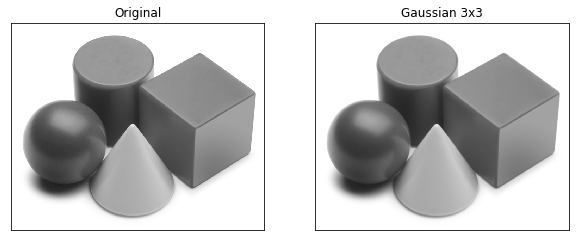

In [17]:
def Gaussiana(img, k):
    blur = cv.GaussianBlur(img,(k,k),0)
    return blur

k = 3

fig = plt.figure(figsize = (10,10))
f1 = fig.add_subplot(121)
f1.imshow(gray,cmap="gray",vmin=0,vmax=255)
f1.set_title('Original')
plt.xticks([]),plt.yticks([])

f2 = fig.add_subplot(122)
f2.imshow(Gaussiana(gray, k),cmap="gray",vmin=0,vmax=255)
f2.set_title('Gaussian %dx%d' %(k,k))
plt.xticks([]),plt.yticks([])

plt.show()

# Laplaciana

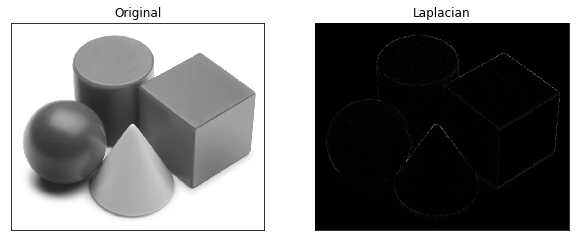

In [18]:
def Laplaciana(img):
    ddepth = cv.CV_16S # ddepth: Depth of the destination image. Since our input is CV_8U we define ddepth = CV_16S to avoid overflow
    lapla = cv.Laplacian(img, ddepth)
    abs_lapla = cv.convertScaleAbs(lapla)
    return abs_lapla

fig = plt.figure(figsize = (10,10))
f1 = fig.add_subplot(121)
f1.imshow(gray,cmap="gray",vmin=0,vmax=255)
f1.set_title('Original')
plt.xticks([]),plt.yticks([])

f2 = fig.add_subplot(122)
f2.imshow(Laplaciana(gray),cmap="gray",vmin=0,vmax=255)
f2.set_title('Laplacian')
plt.xticks([]),plt.yticks([])

plt.show()


# Laplacian on original x Laplacian on Gaussian

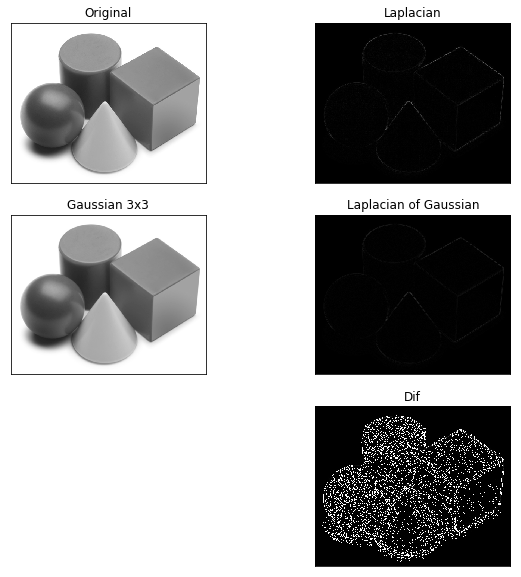

False


In [19]:

k = 3

fig = plt.figure(figsize = (10,10))
f1 = fig.add_subplot(321)
f1.imshow(gray,cmap="gray",vmin=0,vmax=255)
f1.set_title('Original')
plt.xticks([]),plt.yticks([])

lap = Laplaciana(gray)
f2 = fig.add_subplot(322)
f2.imshow(lap,cmap="gray",vmin=0,vmax=255)
f2.set_title('Laplacian')
plt.xticks([]),plt.yticks([])

gau = Gaussiana(gray, k)
f3 = fig.add_subplot(323)
f3.imshow(gau,cmap="gray",vmin=0,vmax=255)
f3.set_title('Gaussian %dx%d' %(k,k))
plt.xticks([]),plt.yticks([])

log = Laplaciana(gau)
f4 = fig.add_subplot(324)
f4.imshow(log,cmap="gray",vmin=0,vmax=255)
f4.set_title('Laplacian of Gaussian')
plt.xticks([]),plt.yticks([])

dif = lap - log
f5 = fig.add_subplot(326)
f5.imshow(dif,cmap="gray",vmin=0,vmax=255)
f5.set_title('Dif')
plt.xticks([]),plt.yticks([])

plt.show()

def is_similar(image1, image2):
    return image1.shape == image2.shape and not(np.bitwise_xor(image1,image2).any())

print(is_similar(lap,log))


# Log x DoG

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

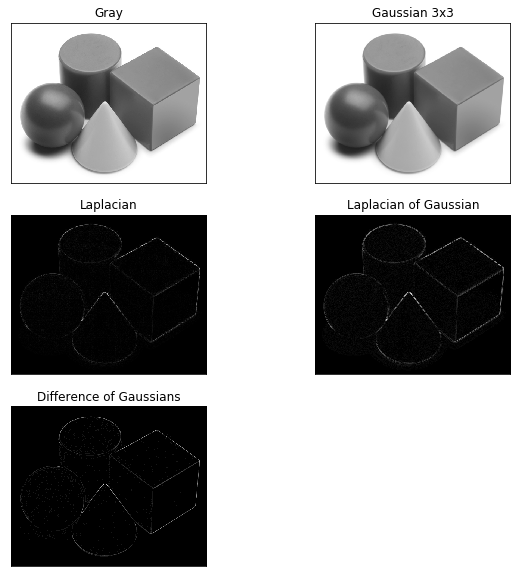

In [20]:
k = 3 # kernel size

# Aplicar Gaussiana
gau1 = cv.GaussianBlur(gray, (k,k), 0)
gau2 = cv.GaussianBlur(gau1, (k,k), 0)

ddepth = cv.CV_16S # ddepth: Depth of the destination image. Since our input is CV_8U we define ddepth = CV_16S to avoid overflow

# Apply Laplace function na gray
lap = cv.Laplacian(gray, ddepth)

# Apply Laplace function na gau1
log = cv.Laplacian(gau1, ddepth)

# difference of Gaussians
dog = cv.subtract(gau2,gau1)

# Visualization
abs_lap = cv.convertScaleAbs(lap)
abs_log = cv.convertScaleAbs(log)
abs_dog = cv.convertScaleAbs(dog)

fig2 = plt.figure(figsize = (10,10))
f1 = fig2.add_subplot(321)
f1.imshow(gray,cmap="gray",vmin=0,vmax=255)
f1.set_title('Gray')
plt.xticks([]),plt.yticks([])

f2 = fig2.add_subplot(322)
f2.imshow(gau1,cmap="gray",vmin=0,vmax=255)
f2.set_title('Gaussian %dx%d' %(k,k))
plt.xticks([]),plt.yticks([])

f3 = fig2.add_subplot(323)
f3.imshow(abs_lap,cmap="gray") #,vmin=0,vmax=255)
f3.set_title('Laplacian')
plt.xticks([]),plt.yticks([])

f4 = fig2.add_subplot(324)
f4.imshow(abs_log,cmap="gray") #,vmin=0,vmax=255)
f4.set_title('Laplacian of Gaussian')
plt.xticks([]),plt.yticks([])

f5 = fig2.add_subplot(325)
f5.imshow(abs_dog, cmap="gray") #,vmin=0,vmax=255)
f5.set_title('Difference of Gaussians')
plt.xticks([]),plt.yticks([])


# Pirâmide (downsampling puro x com gaussiana)

False


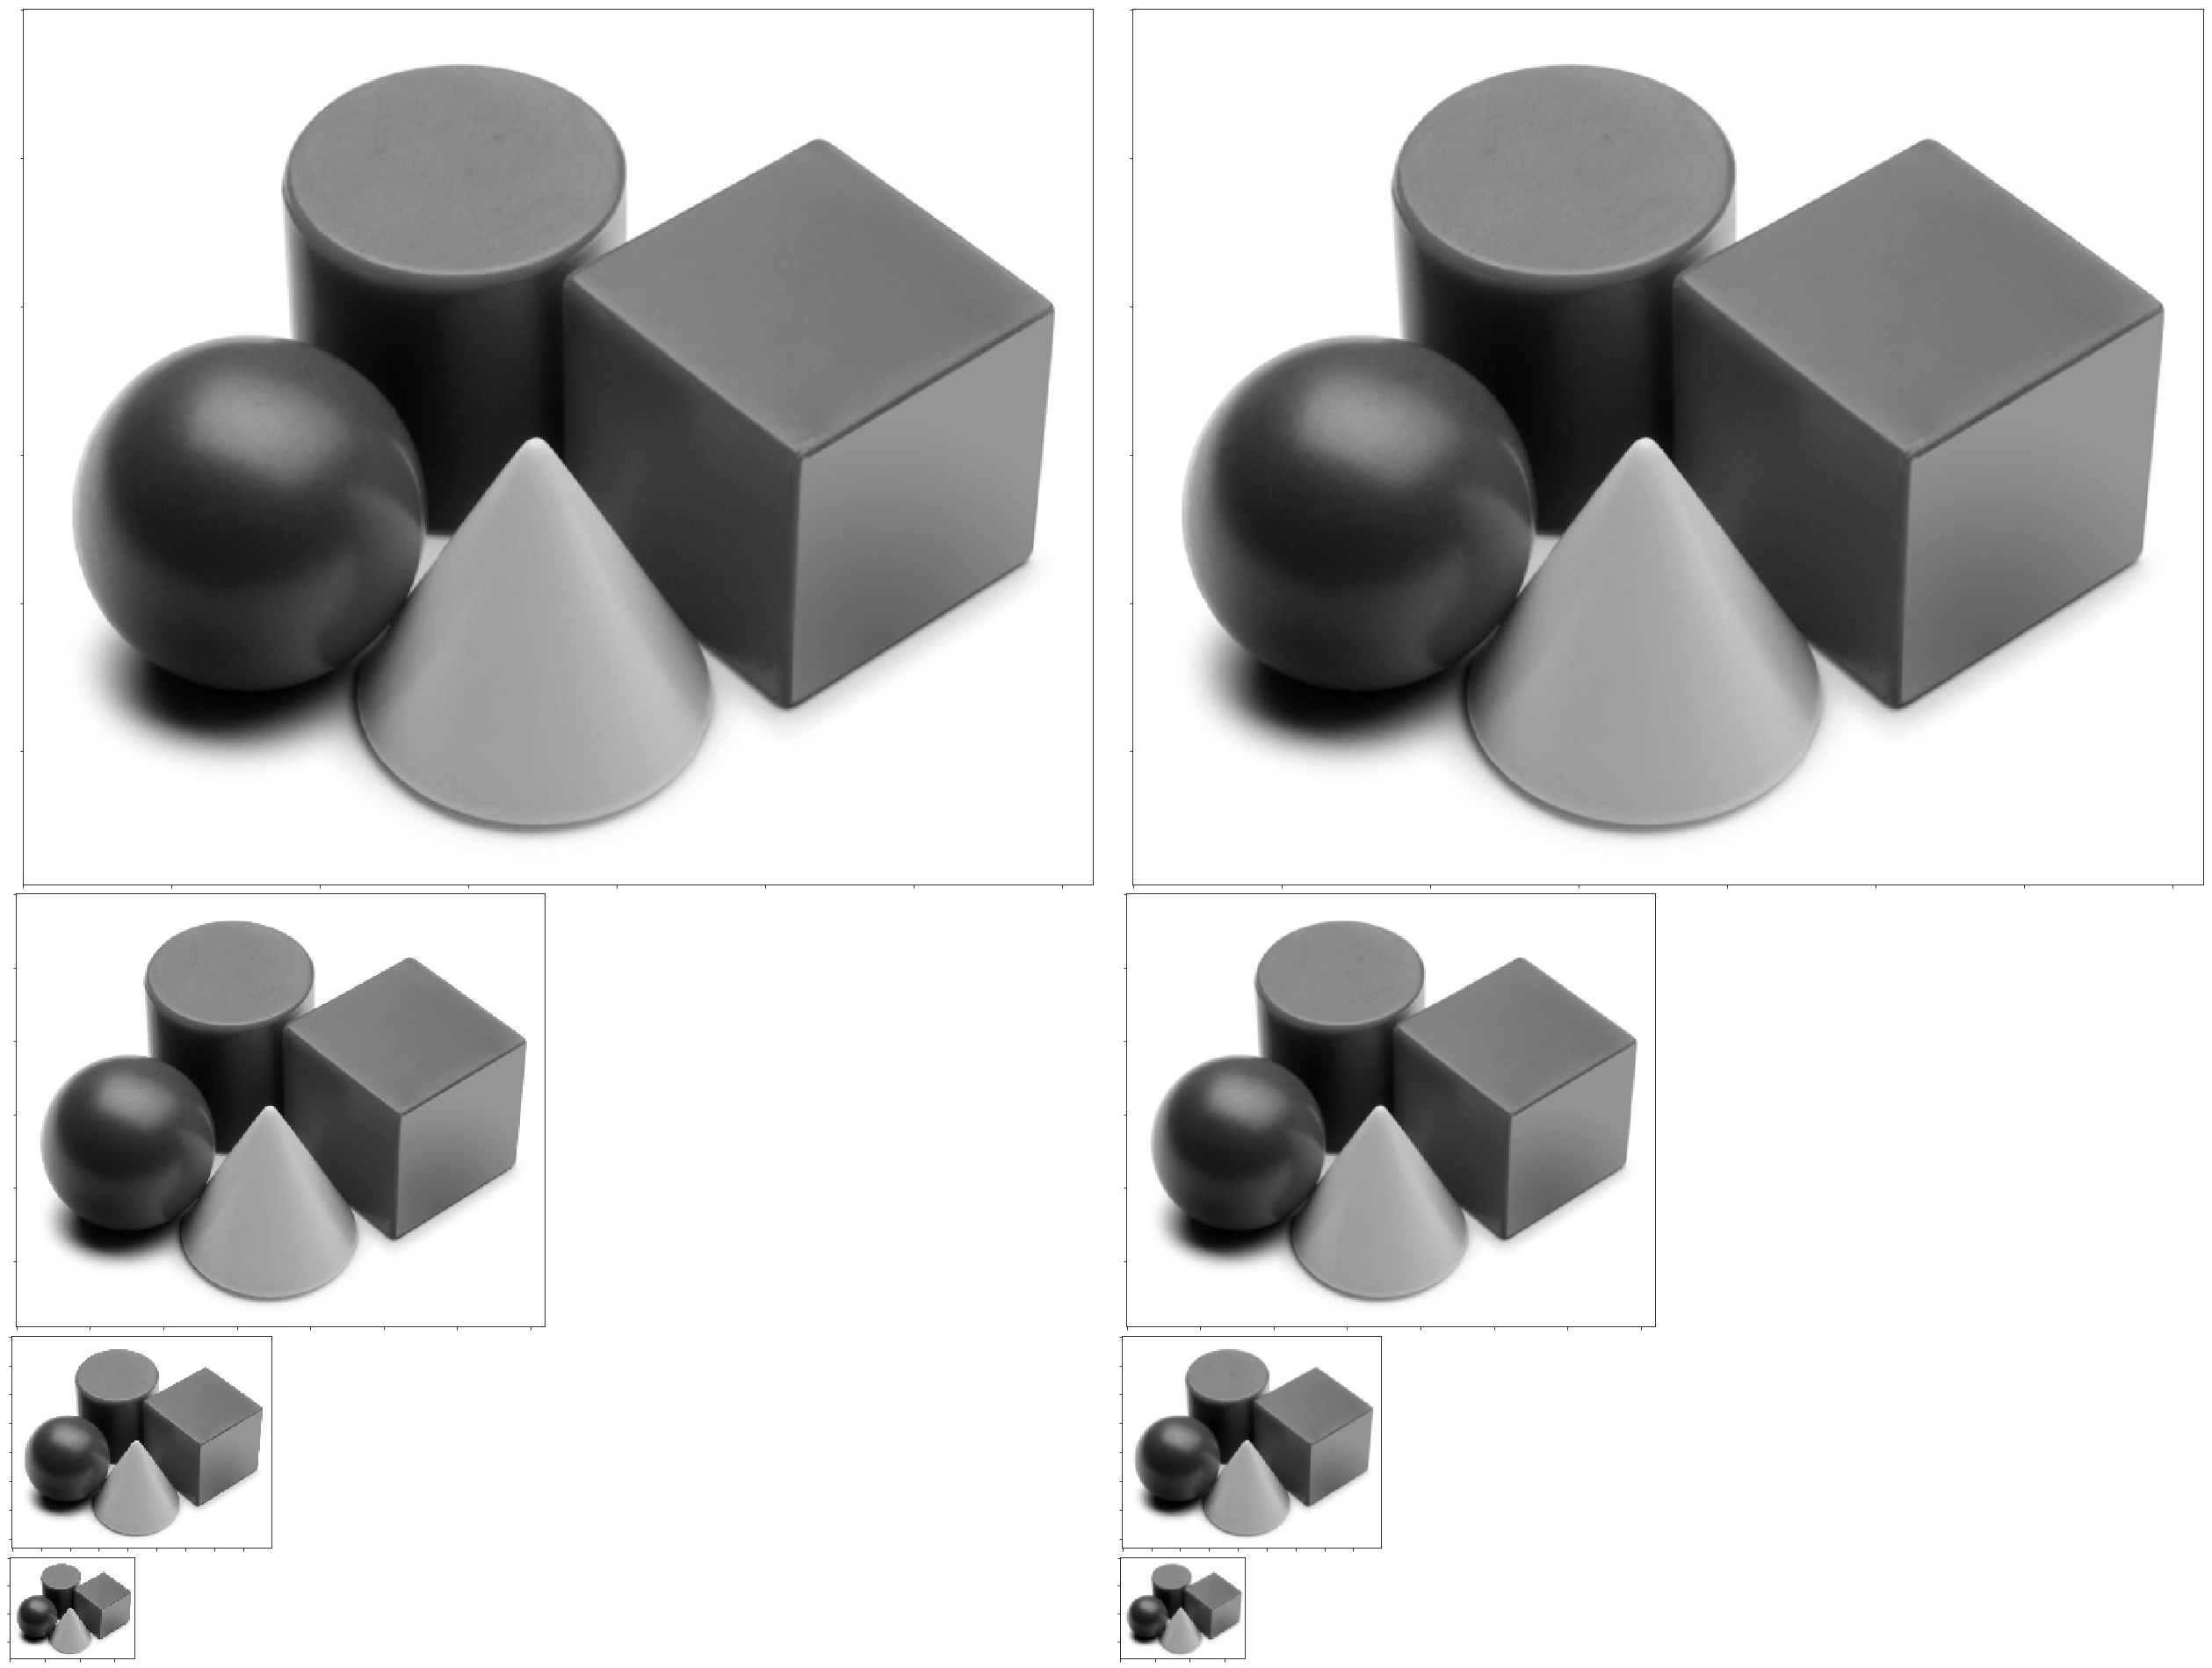

In [21]:
from matplotlib.gridspec import GridSpec

width = int(gray.shape[1] * 50 / 100) 
height = int(gray.shape[0] * 50 / 100) 
dim1 = (width, height)
gray1 = cv.resize(gray, dim1,interpolation=cv.INTER_NEAREST)
width = int(gray1.shape[1] * 50 / 100) 
height = int(gray1.shape[0] * 50 / 100) 
dim2 = (width, height)
gray2 = cv.resize(gray1, dim2,interpolation=cv.INTER_NEAREST)
width = int(gray2.shape[1] * 50 / 100) 
height = int(gray2.shape[0] * 50 / 100) 
dim3 = (width, height)
gray3 = cv.resize(gray2, dim3,interpolation=cv.INTER_NEAREST)

gau0 = Gaussiana(gray,k)
ggray1 = cv.resize(gau0, dim1,interpolation=cv.INTER_NEAREST)
gau1 = Gaussiana(ggray1,k)
ggray2 = cv.resize(gau1, dim2,interpolation=cv.INTER_NEAREST)
gau2 = Gaussiana(ggray2,k)
ggray3 = cv.resize(gau2, dim3,interpolation=cv.INTER_NEAREST)

print(is_similar(gray1,ggray1))

dpi = 80
#height, width, depth = img.shape
height, width = gray.shape
figsize = 5*(width / float(dpi)), 5*(height / float(dpi))
fig = plt.figure(figsize=figsize)
#fig = plt.figure(figsize=(20,20))
gs = GridSpec(32, 32)

ax0 = plt.subplot(gs[0:16,0:16])
ax0.imshow(gray, cmap='gray')
ax0.tick_params(labelbottom=False, labelleft=False)
ax1 = plt.subplot(gs[0:16,16:])
ax1.imshow(gray, cmap='gray')
ax1.tick_params(labelbottom=False, labelleft=False)

ax2 = plt.subplot(gs[16:24,0:8])
ax2.imshow(gray1, cmap='gray')
ax2.tick_params(labelbottom=False, labelleft=False)
ax3 = plt.subplot(gs[16:24,16:24])
ax3.imshow(ggray1, cmap='gray')
ax3.tick_params(labelbottom=False, labelleft=False)

ax4 = plt.subplot(gs[24:28,0:4])
ax4.imshow(gray2, cmap='gray')
ax4.tick_params(labelbottom=False, labelleft=False)
ax5 = plt.subplot(gs[24:28,16:20])
ax5.imshow(ggray2, cmap='gray')
ax5.tick_params(labelbottom=False, labelleft=False)

ax6 = plt.subplot(gs[28:30,0:2])
ax6.imshow(gray3, cmap='gray')
ax6.tick_params(labelbottom=False, labelleft=False)
ax7 = plt.subplot(gs[28:30,16:18])
ax7.imshow(ggray3, cmap='gray')
ax7.tick_params(labelbottom=False, labelleft=False)
plt.show()